In [39]:
class Player(object):
    def __init__(self, Name):
        self.hand = []
        self.name = Name
        self.points = 0
        #self.deck = Deck()
        
    def calculatePoints(self):
        points = 0
        for card in self.hand:
            temp = card
            points += int(temp)
        #print(temp)
        return points
    
    def draw(self):
        self.hand.append(random.randrange(1,11,1))
        

In [40]:
#not used
class Deck():
    def __init__(self):
        self.deck = ['1','2','3','4','5','6','7','8','9','10']
         

In [44]:
import random

class Game():
    
    def __init__(self):
        self.player = Player('player')
        self.dealer = Player('dealer')
        self.terminal = False
        #start the game with one card for both player and dealer
        self.player.draw()
        self.dealer.draw()
        
        self.playerpoints = self.player.calculatePoints()
        self.dealerpoints = self.dealer.calculatePoints()
   
        
    def play(game,playerpoints,dealerpoints,action):
        temp1 = playerpoints
        temp2 = dealerpoints
        state = 0
        reward = None
        if action == 1:
            #game.player.hand.append(game.draw())
            game.player.draw()
            temp1 =+ game.player.calculatePoints()
            #print('player',temp1)
            # if player is bust 
            if temp1 > 21:
                reward = -10
                game.terminal = True
                temp1 = playerpoints
            else:
                reward = 1
                game.terminal = False
        if action == 0:
                while dealerpoints < 17:
                    game.dealer.draw()
                    temp2 = game.dealer.calculatePoints()
                    #print('dealer',dealerpoints)
                    if temp2 > 21:
                        reward = 1
                        game.terminal = True
                        return playerpoints, reward
                    else:
                        dealerpoints = temp2
                        if playerpoints < dealerpoints:
                            reward = -1
                        elif playerpoints == dealerpoints:
                            reward = 0
                        elif playerpoints > dealerpoints:
                            reward = 2
                    game.terminal = True
        #print('final',reward)
        return temp1 , reward
            

In [47]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def random_policy():
    return 1 if random.random() < 0.5 else 0

def QL(iterations):

    # number of wins
    g = 0
    wins = 0
    winrecord = []
    action_size = 2
    state_size = 210
    #initialized Q table withe all zeros
    Q = np.zeros((state_size, action_size))
    #assign states with row_name to the q_table with the format 'playerpoints,dealershowing'
    row_name = []
    for i in range(1,22):
        for j in range(1,11):
            row_name.append("{},{}".format(i,j))
    q_table = pd.DataFrame(Q,index = row_name)
    
    alpha = 0.1
    gamma = 1
    epsilon = 0.1


    for j in range(iterations):
        # create a new random starting state
        #print('new game')
        game = Game()
        player = game.playerpoints
        dealer = game.dealerpoints
        action = None
        reward = None
        # play a round
        observed_keys = []
        playerstate = player
        dealerstate = dealer
        while not game.terminal:
            # find an action defined by the policy
            if random.uniform(0, 1) < epsilon:
                action = random_policy()
                #print('action',action)
            else:
                action = q_table.loc[str(playerstate)+','+str(dealerstate)].idxmax()

            # take a step
            #print('step, action',action)
            #reward = Game.play(game, player, dealer, action, reward)
            nextplayerstate,reward = Game.play(game, player, dealer, action)
            
            #print('action',action)
            old_value = q_table.loc[str(playerstate)+','+str(dealerstate)][action]
            #print('old',old_value)
            next_max = np.max(q_table.loc[str(nextplayerstate)+','+str(dealerstate)])
            #print('nex',next_max)
            
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            #print('reward',reward,new_value)
            q_table.loc[str(playerstate)+','+str(dealerstate)][action] = new_value
            
            playerstate = nextplayerstate
        # we have reached an end of episode
        
        if j > iterations -25:
            g +=1
            if reward ==1:
                wins +=1
            winrecord.append(wins/g)
        
        
    #rint(winrecord)
    
    return q_table,winrecord
    
       


In [ ]:
g.play(12,1,1,0)


In [ ]:
g.play(18,1,0,0)

In [48]:
Q_table,winrecord = QL(10000)
Q_table

game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game


,0,1
"1,1",2.008789,6.621296
"1,2",0.883994,6.737646
"1,3",0.677742,6.754513
"1,4",2.119100,6.800963
"1,5",1.365806,6.004774
...,...,...
"21,6",4.267025,-0.915722
"21,7",2.469492,-1.761236
"21,8",0.993406,0.000000
"21,9",2.370235,-0.838162


In [ ]:
Q_table2,winrecord2 = QL(10000)

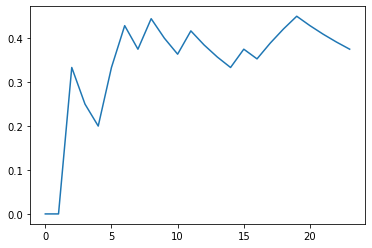

In [49]:
plt.plot(winrecord)

In [ ]:
plt.plot(winr25)

In [68]:
#dynamic 𝛼 and epsilon
import math

def QL1(iterations,a,e):

    # number of wins
    g = 0
    wins = 0
    record = []
    winrate = []
    action_size = 2
    state_size = 210
    #initialized Q table withe all zeros
    Q = np.zeros((state_size, action_size))
    #assign states with row_name to the q_table with the format 'playerpoints,dealershowing'
    row_name = []
    for i in range(1,22):
        for j in range(1,11):
            row_name.append("{},{}".format(i,j))
    q_table = pd.DataFrame(Q,index = row_name)
    
    #alpha = 0.1
    gamma = 1
    #epsilon = 0.1
    #epsilon = e

    for j in range(iterations):
        # create a new random starting state
        #print('new game')
        game = Game()
        player = game.playerpoints
        dealer = game.dealerpoints
        action = None
        reward = None
        playerstate = player
        dealerstate = dealer
        
        #alpha decays with the increase of iterations
        #alpha = a*(j+1)*0.01
        #epsilon = e*(j+1)*0.00001
        alpha = a*math.exp(-0.1*(j+1)/500)
        epsilon = e*math.exp(-(j+1)/2000)
        
        while not game.terminal:
            # find an action defined by the policy
            if random.uniform(0, 1) < epsilon:
                action = random_policy()
                #print('randaction',action)
            else:
                #print('action','playerss',playerstate)
                action = q_table.loc[str(playerstate)+','+str(dealerstate)].idxmax()
            # take a step
            #print('action',action)
            nextplayerstate,reward = Game.play(game,player, dealer, action)
            
            old_value = q_table.loc[str(playerstate)+','+str(dealerstate)][action]
            #print('old',old_value)
            next_max = np.max(q_table.loc[str(nextplayerstate)+','+str(dealerstate)])
            #print('nex',)
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            #print('reward',reward,new_value)
            q_table.loc[str(playerstate)+','+str(dealerstate)][action] = new_value
            playerstate = nextplayerstate
            
            #print('ps,nps',playerstate,nextplayerstate)
            
        if j > iterations -25:
            g +=1
            if reward ==1:
                wins +=1
            record.append(reward)
            winrate.append(wins/g)
        
    #rint(winrecord)
    
    return q_table,winrate,record
    

In [71]:
Q_table1,winrate1 = QL(10000)

game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game
game


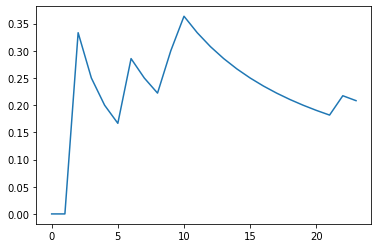

In [72]:
plt.plot(winrate1)

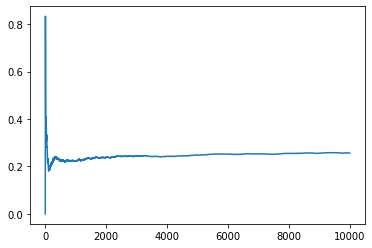

In [67]:
win3 = winrate1
plt.plot(winrate1)

In [56]:
Q_table1

,0,1
"1,1",0.290274,2.995714
"1,2",0.031045,3.059021
"1,3",0.341567,2.847335
"1,4",0.113560,3.179667
"1,5",-0.012399,3.043835
...,...,...
"21,6",0.518496,-1.015434
"21,7",1.014349,-3.043285
"21,8",0.640477,-0.880338
"21,9",0.430938,-2.682823


In [ ]:
from mpl_toolkits import mplot3d

df = Q_table
xdata=[]
ydata=[]
zdata=[]
for i in range(1,22):
    for j in range(1,11):
        xdata.append(j)
        ydata.append(i)
    
#for a in range(len(df)):
#    zdata.append(df.max())
zdata = df.max(axis=1)
ax = plt.axes(projection='3d')

ax.plot3D(xdata, ydata, zdata)
ax.set_xlabel('dealershowing')
ax.set_ylabel('playersum')
ax.set_zlabel('V*(s)')

In [ ]:
a= df.loc['1,1']
ps = 12
ds = 10
st = str(ps)+','+str(ds)
#df.loc[st] = [0,0]
Q_table1.loc[st].idxmax()

In [14]:
1*math.exp(-(10000+1)/2000)


0.006734578867688945

In [ ]:
df

In [ ]:
game = Game()

In [ ]:
g.play(g,7,10,1)

In [ ]:
Game.play(game, 6, 10, 1)